<a href="https://colab.research.google.com/github/JaiVR/nir_chemometrics/blob/main/chemometrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
cultivars = pd.read_csv('cultivars.csv')
iris = pd.read_csv('iris.csv')
iris2 = pd.read_csv('iris2.csv')
irisclass = pd.read_csv('irisclass.csv')
soil = pd.read_csv('soil.csv')
spectra = pd.read_csv('spectra.csv')
gasoline = pd.read_csv('nir_gasoline.csv')
octane = pd.read_csv('octane.csv')
wines = pd.read_csv('wines.csv')

In [ ]:
column_names_wine = ["Alcohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium",
                     "Total_Phenols", "Flavanoids", "Nonflavanoid_Phenols", "Proanthocyanins",
                     "Color_Intensity", "Hue", "OD280/OD315", "Proline"]
wines = pd.read_csv('wines.csv', header=None, names=column_names_wine)

cultivars = pd.read_csv('cultivars.csv', header=None, names=["Cultivar"])

column_names_iris = ["Sepal_Length", "Sepal_Width", "Petal_Length", "Petal_Width", "Species"]
iris = pd.read_csv('iris.csv', header=None, names=column_names_iris)
iris2 = pd.read_csv('iris2.csv', header=None, names=column_names_iris)
irisclass = pd.read_csv('irisclass.csv', header=None, names=["Species"])

column_names_soil = [f"property{i+1}" for i in range(300)]  # replace with actual property names
soil = pd.read_csv('soil.csv', header=None, names=column_names_soil).dropna(axis=1, how='all')

column_names_gasoline = [f"wavelength{i}" for i in range(gasoline.shape[1])]
gasoline = pd.read_csv('nir_gasoline.csv', header=None, names=column_names_gasoline)
octane = pd.read_csv('octane.csv', header=None, names=["Octane"])

column_names_spectra = [f"Wavelength_{i+1}" for i in range(spectra.shape[1])]
spectra = pd.read_csv('spectra.csv', header=None, names=column_names_spectra).dropna(axis=1, how='all')



In [ ]:
pd.DataFrame(cultivars).head()

,Cultivar
0,1
1,1
2,1
3,1
4,1


In [ ]:
pd.DataFrame(iris).head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,NaN
1,4.9,3.0,1.4,0.2,NaN
2,4.7,3.2,1.3,0.2,NaN
3,4.6,3.1,1.5,0.2,NaN
4,5.0,3.6,1.4,0.2,NaN


In [ ]:
pd.DataFrame(iris2).head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.10,3.50,1.40,0.20,NaN
1,4.90,3.00,1.40,0.20,NaN
2,4.70,3.20,1.30,0.20,NaN
3,4.60,3.10,1.50,0.20,NaN
4,7.91,2.68,3.87,3.86,NaN


In [ ]:
pd.DataFrame(irisclass).head()

,Species
0,1
1,1
2,1
3,1
4,1


In [ ]:
pd.DataFrame(soil).head()

,property4,property7,property10,property13,property16,property19,property22,property25,property28,property31,property34,property37,property40,property43,property46,property49,property52,property55
0,1,10.0,110.0,71.65,4.22,92.64,482.7,591.9,169.2,4.42,7.38,3,18.13,12.46,0,110,110,2
1,1,20.0,120.0,77.57,4.70,96.46,515.1,618.2,178.0,2.09,8.45,3,20.78,9.04,0,105,105,2
2,1,30.0,130.0,72.45,4.73,85.60,495.9,566.1,152.8,0.00,7.88,3,19.88,13.34,0,110,125,2
3,1,40.0,140.0,82.42,4.90,100.77,582.2,664.6,186.8,0.00,7.60,3,23.12,10.18,120,0,0,1
4,1,50.0,150.0,75.84,4.99,90.73,523.6,609.1,169.3,14.67,7.49,3,18.05,12.90,110,110,0,2


In [ ]:
pd.DataFrame(spectra).head()

,Wavelength_4,Wavelength_7,Wavelength_10,Wavelength_13,Wavelength_16,Wavelength_19,Wavelength_22,Wavelength_25,Wavelength_28,Wavelength_31,...,Wavelength_2977,Wavelength_2980,Wavelength_2983,Wavelength_2986,Wavelength_2989,Wavelength_2992,Wavelength_2995,Wavelength_2998,Wavelength_3001,Wavelength_3004
0,0.009431,0.009257,0.009481,0.009474,0.009599,0.009763,0.009568,0.009393,0.009308,0.009423,...,0.376564,0.375004,0.374376,0.373539,0.372217,0.370576,0.369675,0.368701,0.369124,0.370287
1,0.041748,0.040598,0.039958,0.038715,0.037538,0.036495,0.035896,0.035116,0.034186,0.033037,...,0.333979,0.332779,0.331876,0.330899,0.330268,0.329582,0.329571,0.329721,0.329184,0.328181
2,0.013532,0.008568,0.008615,0.003563,0.005021,0.009459,0.003271,0.007068,0.011695,0.008718,...,0.370754,0.368937,0.367964,0.366907,0.365677,0.364056,0.362634,0.360987,0.361042,0.361374
3,0.009192,0.009246,0.009689,0.009127,0.008934,0.008971,0.008738,0.008877,0.009029,0.008843,...,0.409460,0.408177,0.406663,0.404834,0.403125,0.401323,0.400588,0.399352,0.397454,0.394849
4,0.009064,0.009037,0.008628,0.008872,0.008843,0.008636,0.008581,0.000000,0.008515,0.008611,...,0.361877,0.360022,0.359257,0.358620,0.358302,0.357758,0.356371,0.354177,0.352289,0.350252


In [ ]:
pd.DataFrame(gasoline).head()

,wavelength0,wavelength1,wavelength2,wavelength3,wavelength4,wavelength5,wavelength6,wavelength7,wavelength8,wavelength9,...,wavelength391,wavelength392,wavelength393,wavelength394,wavelength395,wavelength396,wavelength397,wavelength398,wavelength399,wavelength400
0,-0.044227,-0.039602,-0.035673,-0.030911,-0.026675,-0.023871,-0.022571,-0.025410,-0.028960,-0.032740,...,1.128877,1.148342,1.189116,1.223242,1.253306,1.282889,1.215065,1.225211,1.227985,1.198851
1,-0.046867,-0.041260,-0.036979,-0.031458,-0.026520,-0.023346,-0.021392,-0.024993,-0.029309,-0.033920,...,1.147964,1.167798,1.198287,1.237383,1.260979,1.276677,1.218871,1.223132,1.230321,1.208742
2,-0.046705,-0.042240,-0.038561,-0.034513,-0.030206,-0.027680,-0.026042,-0.028280,-0.030920,-0.034012,...,1.160089,1.169350,1.201066,1.233299,1.262966,1.272709,1.211068,1.215044,1.232655,1.206696
3,-0.050859,-0.045145,-0.041025,-0.036357,-0.032747,-0.031498,-0.031415,-0.034611,-0.037781,-0.040752,...,1.252712,1.238013,1.259616,1.273713,1.296524,1.299507,1.226448,1.230718,1.232864,1.202926
4,-0.048094,-0.042739,-0.038812,-0.034017,-0.030143,-0.027690,-0.026387,-0.028811,-0.031481,-0.034124,...,1.214046,1.210217,1.241090,1.262138,1.288401,1.291118,1.229769,1.227615,1.227630,1.207576


In [ ]:
pd.DataFrame(octane).head()

,Octane
0,85.25
1,88.45
2,83.40
3,87.90
4,85.50


In [ ]:
pd.DataFrame(wines).head()

,Alcohol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280/OD315,Proline
0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
2,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
3,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
4,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


In [ ]:
print("nans:",np.isnan(wines).sum())
print("inf:",np.isinf(wines).sum())

nans: Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64
inf: Alcohol                 0
Malic_Acid              0
Ash                     0
Alcalinity_of_Ash       0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280/OD315             0
Proline                 0
dtype: int64


In [ ]:
iris.columns

Index(['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width',
       'Species'],
      dtype='object')

In [ ]:
iris = iris.drop(columns=['Species'])
iris2 = iris2.drop(columns=['Species'])

In [ ]:
print("nans:",np.isnan(iris).sum())
print("inf:",np.isinf(iris).sum())

nans: Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
dtype: int64
inf: Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
dtype: int64


In [ ]:
print("nans:",np.isnan(iris2).sum())
print("inf:",np.isinf(iris2).sum())

nans: Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
dtype: int64
inf: Sepal_Length    0
Sepal_Width     0
Petal_Length    0
Petal_Width     0
dtype: int64


In [ ]:
print("nans:",np.isnan(irisclass).sum())
print("inf:",np.isinf(irisclass).sum())

nans: Species    0
dtype: int64
inf: Species    0
dtype: int64


In [ ]:
print("nans:",np.isnan(soil).sum())
print("inf:",np.isinf(soil).sum())

nans: property4     0
property7     0
property10    0
property13    0
property16    0
property19    0
property22    0
property25    0
property28    0
property31    0
property34    0
property37    0
property40    0
property43    0
property46    0
property49    0
property52    0
property55    0
dtype: int64
inf: property4     0
property7     0
property10    0
property13    0
property16    0
property19    0
property22    0
property25    0
property28    0
property31    0
property34    0
property37    0
property40    0
property43    0
property46    0
property49    0
property52    0
property55    0
dtype: int64


In [ ]:
print("nans:",np.isnan(spectra).sum())
print("inf:",np.isinf(spectra).sum())

nans: Wavelength_4       0
Wavelength_7       0
Wavelength_10      0
Wavelength_13      0
Wavelength_16      0
                  ..
Wavelength_2992    0
Wavelength_2995    0
Wavelength_2998    0
Wavelength_3001    0
Wavelength_3004    0
Length: 1001, dtype: int64
inf: Wavelength_4       0
Wavelength_7       0
Wavelength_10      0
Wavelength_13      0
Wavelength_16      0
                  ..
Wavelength_2992    0
Wavelength_2995    0
Wavelength_2998    0
Wavelength_3001    0
Wavelength_3004    0
Length: 1001, dtype: int64


In [ ]:
print("nans:",np.isnan(gasoline).sum())
print("inf:",np.isinf(gasoline).sum())

nans: wavelength0      0
wavelength1      0
wavelength2      0
wavelength3      0
wavelength4      0
                ..
wavelength396    0
wavelength397    0
wavelength398    0
wavelength399    0
wavelength400    0
Length: 401, dtype: int64
inf: wavelength0      0
wavelength1      0
wavelength2      0
wavelength3      0
wavelength4      0
                ..
wavelength396    0
wavelength397    0
wavelength398    0
wavelength399    0
wavelength400    0
Length: 401, dtype: int64


In [ ]:
print("nans:",np.isnan(octane).sum())
print("inf:",np.isinf(octane).sum())

nans: Octane    0
dtype: int64
inf: Octane    0
dtype: int64


so soil and spectra have nans

In [ ]:
#simple imputer for soil and spectra
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(soil)
soil = imputer.transform(soil)
imputer.fit(spectra)
spectra = imputer.transform(spectra)

In [ ]:
has_nans = np.isnan(soil).any()
has_infs = np.isinf(soil).any()
print("Contains NaNs:", has_nans)
print("Contains Infs:", has_infs)
num_nans = np.isnan(soil).sum()
print("Number of NaNs in the 'soil' dataset:", num_nans)

Contains NaNs: False
Contains Infs: False
Number of NaNs in the 'soil' dataset: 0


In [ ]:
has_nans = np.isnan(soil).any()
has_infs = np.isinf(soil).any()

print("Contains NaNs:", has_nans)
print("Contains Infs:", has_infs)
num_nans = np.isnan(soil).sum()

print("Number of NaNs in the 'soil' dataset:", num_nans)

Contains NaNs: False
Contains Infs: False
Number of NaNs in the 'soil' dataset: 0


In [ ]:
has_nans = np.isnan(soil).any()
has_infs = np.isinf(soil).any()

print("Contains NaNs:", has_nans)
print("Contains Infs:", has_infs)
num_nans = np.isnan(soil).sum()

print("Number of NaNs in the 'soil' dataset:", num_nans)

Contains NaNs: False
Contains Infs: False
Number of NaNs in the 'soil' dataset: 0


In [ ]:
has_nans = np.isnan(soil).any()
has_infs = np.isinf(soil).any()

print("Contains NaNs:", has_nans)
print("Contains Infs:", has_infs)
num_nans = np.isnan(soil).sum()

print("Number of NaNs in the 'soil' dataset:", num_nans)

Contains NaNs: False
Contains Infs: False
Number of NaNs in the 'soil' dataset: 0


In [ ]:
has_nans = np.isnan(soil).any()
has_infs = np.isinf(soil).any()

print("Contains NaNs:", has_nans)
print("Contains Infs:", has_infs)
num_nans = np.isnan(soil).sum()

print("Number of NaNs in the 'soil' dataset:", num_nans)

Contains NaNs: False
Contains Infs: False
Number of NaNs in the 'soil' dataset: 0


normalizing the data

In [ ]:
scaler = StandardScaler()
wines = scaler.fit_transform(wines)
wines = wines.astype(np.float32)
iris  = scaler.fit_transform(iris)
iris = iris.astype(np.float32)
iris2 = scaler.fit_transform(iris2)
iris2 = iris2.astype(np.float32)
irisclass = scaler.fit_transform(irisclass)
irisclass = irisclass.astype(np.float32)
soil = scaler.fit_transform(soil)
soil = soil.astype(np.float32)
gasoline = scaler.fit_transform(gasoline)
gasoline = gasoline.astype(np.float32)
# octane = scaler.fit_transform(octane)
# octane = octane.astype(np.float32)
spectra = scaler.fit_transform(spectra)
spectra = spectra.astype(np.float32)
cultivars = scaler.fit_transform(cultivars)
cultivars = cultivars.astype(np.float32)

# PCA

In [ ]:
covariance_matrix = np.cov(wines.T) #this is a n*n matrix which summarizes relation btw all pairs of features of wines
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

In [ ]:
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

In [ ]:
k=2
projection_matrix = np.hstack([eig_pairs[i][1].reshape(-1, 1) for i in range(k)])

In [ ]:
wines_pca_manual = wines.dot(projection_matrix)

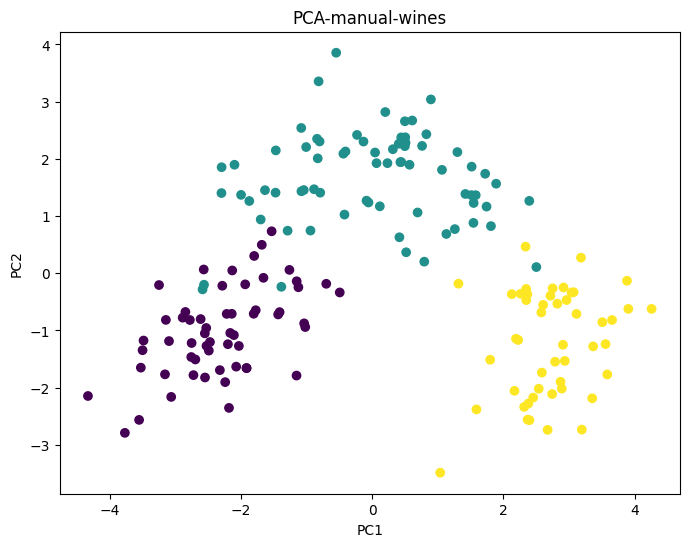

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(wines_pca_manual[:, 0], wines_pca_manual[:, 1], c=cultivars)
plt.title('PCA-manual-wines')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

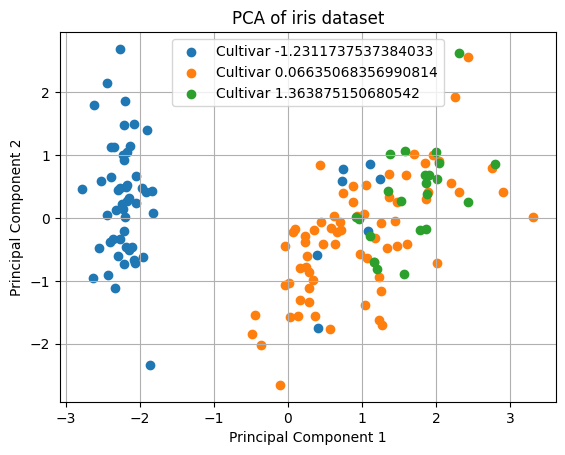

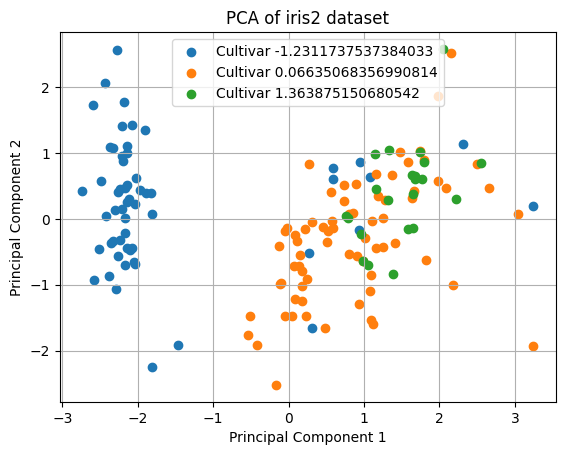

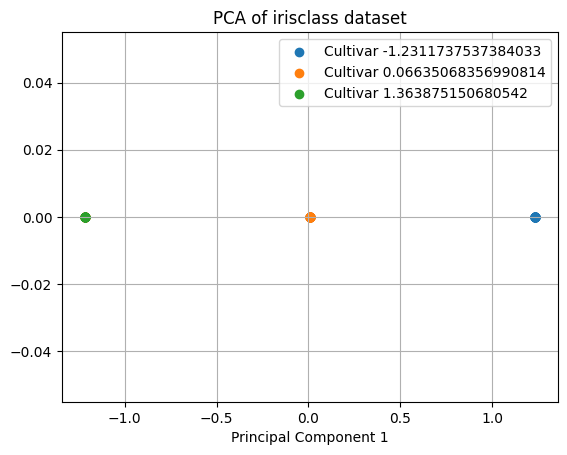

In [ ]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
imputer = SimpleImputer(strategy='mean')
wines_imputed = imputer.fit_transform(wines)

scaled_wines = StandardScaler().fit_transform(wines_imputed)

pca = PCA(n_components=5)
wines_pca = pca.fit_transform(scaled_wines)

datasets = [iris, iris2, irisclass]

pca_results = []

for data in datasets:
    data_imputed = imputer.fit_transform(data)
    scaled_data = StandardScaler().fit_transform(data_imputed)

    n_samples, n_features = scaled_data.shape
    n_components = min(n_samples, n_features, 5)

    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)

    pca_results.append(principal_components)

dataset_names = ['iris', 'iris2', 'irisclass']
def plot_pca_with_cultivars(data, cultivars, name):
    data_imputed = imputer.fit_transform(data)
    scaled_data = StandardScaler().fit_transform(data_imputed)

    n_samples, n_features = scaled_data.shape
    n_components = min(n_samples, n_features, 2)

    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(scaled_data)
    pca_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(n_components)])
    pca_df['Cultivar'] = cultivars[:len(pca_df)]
    plt.figure()
    unique_cultivars = pca_df['Cultivar'].unique()
    for cultivar in unique_cultivars:
        indices = pca_df['Cultivar'] == cultivar
        if n_components == 1:
            plt.scatter(pca_df.loc[indices, 'PC1'], np.zeros_like(pca_df.loc[indices, 'PC1']), label=f'Cultivar {cultivar}')
        else:
            plt.scatter(pca_df.loc[indices, 'PC1'], pca_df.loc[indices, 'PC2'], label=f'Cultivar {cultivar}')

    plt.title(f'PCA of {name} dataset')
    plt.xlabel('Principal Component 1')
    if n_components > 1:
        plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

for data, name in zip(datasets, dataset_names):
    plot_pca_with_cultivars(data, cultivars, name)

# PLS Regression

In [ ]:
min_rows = min(principal_components.shape[0] for principal_components in pca_results + [wines_pca])

wines_pca_truncated = wines_pca[:min_rows, :]
pca_results_truncated = [pc[:min_rows, :] for pc in pca_results]

all_pca_results = np.hstack([wines_pca_truncated] + pca_results_truncated)

X = all_pca_results
y = cultivars[:min_rows]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

y_pred = pls.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, y_pred)}')

MSE: 0.13189139893560303


# PCA for nir_spectra and octane

In [ ]:
octane = octane.round()

In [ ]:
pd.DataFrame(octane).head()

,Octane
0,85.0
1,88.0
2,83.0
3,88.0
4,86.0


In [ ]:
octane = np.array(octane)
octane = np.where(octane < 85, 80, octane)
octane = np.where(octane == 85, 85, octane)
octane = np.where(octane > 85, octane, octane)

In [ ]:
octane = scaler.fit_transform(octane)
octane = octane.astype(np.float32)

In [ ]:
covariance_matrix = np.cov(gasoline.T) #this is a n*n matrix which summarizes relation btw all pairs of features of gasoline
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
eig_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)
k=10
projection_matrix = np.hstack([eig_pairs[i][1].reshape(-1, 1) for i in range(k)])
gasoline_pca_manual = gasoline.dot(projection_matrix)

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


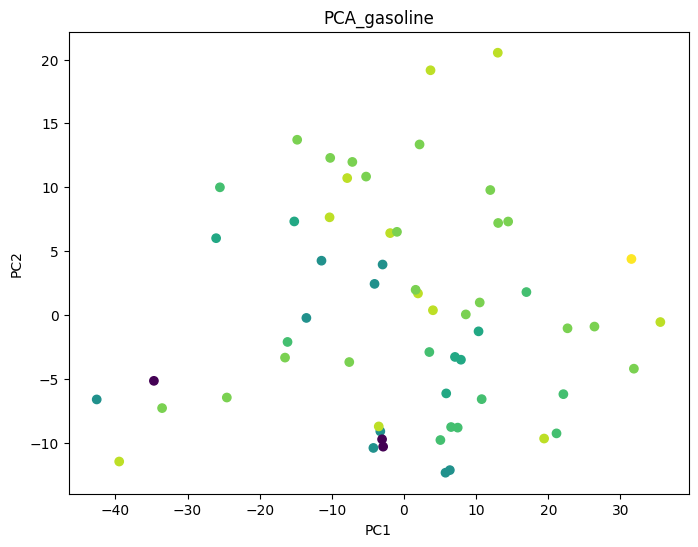

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(gasoline_pca_manual[:, 0], gasoline_pca_manual[:, 1], c=octane)
plt.title('PCA_gasoline')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()